In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [16]:
df=pd.read_csv('bike_sales_100k.csv')

In [18]:
df.head()

Sale_ID        Date  Customer_ID     Bike_Model    Price  Quantity  \
0        1  11-07-2022         9390        Cruiser   318.32         1   
1        2  03-05-2024         3374    Hybrid Bike  3093.47         4   
2        3  01-09-2022         2689   Folding Bike  4247.99         3   
3        4  28-09-2022         3797  Mountain Bike  1722.01         3   
4        5  05-01-2021         1633            BMX  3941.44         3   

  Store_Location  Salesperson_ID Payment_Method  Customer_Age Customer_Gender  
0   Philadelphia             589      Apple Pay            70          Female  
1        Chicago             390      Apple Pay            37            Male  
2    San Antonio             338         PayPal            59          Female  
3    San Antonio             352      Apple Pay            19            Male  
4   Philadelphia             580         PayPal            67          Female

In [20]:
df.isnull()

Sale_ID   Date  Customer_ID  Bike_Model  Price  Quantity  \
0        False  False        False       False  False     False   
1        False  False        False       False  False     False   
2        False  False        False       False  False     False   
3        False  False        False       False  False     False   
4        False  False        False       False  False     False   
...        ...    ...          ...         ...    ...       ...   
99995    False  False        False       False  False     False   
99996    False  False        False       False  False     False   
99997    False  False        False       False  False     False   
99998    False  False        False       False  False     False   
99999    False  False        False       False  False     False   

       Store_Location  Salesperson_ID  Payment_Method  Customer_Age  \
0               False           False           False         False   
1               False           False           False         False   
2               False           False           False         False   
3               False           False           False         False   
4               False           False           False         False   
...               ...             ...             ...           ...   
99995           False           False           False         False   
99996           False           False           False         False   
99997           False           False           False         False   
99998           False           False           False         False   
99999           False           False           False         False   

       Customer_Gender  
0                False  
1                False  
2                False  
3                False  
4                False  
...                ...  
99995            False  
99996            False  
99997            False  
99998            False  
99999            False  

[100000 rows x 11 columns]

In [22]:
df['Revenue']=df.Quantity*df.Price

In [24]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [26]:
YTD_Revenue=df.groupby(['year']).apply(lambda x:x['Revenue'].sum()).reset_index(name='sum')
YTD_Revenue.head()

year           sum
0  2020  1.642245e+08
1  2021  1.635352e+08
2  2022  1.655607e+08
3  2023  1.644976e+08
4  2024  1.206162e+08

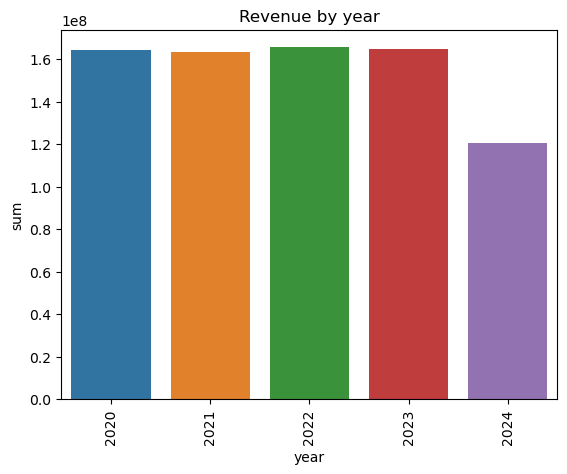

In [32]:
sns.barplot(data=YTD_Revenue ,x='year',y='sum')
plt.title("Revenue by year")
plt.xticks(rotation=90)
plt.show()

In [34]:
# Step 2: Get the last date in the data
last_date = df['Date'].max()
current_year = last_date.year

# Step 3: Filter for the current year's YTD
df_ytd = df[(df['Date'].dt.year == current_year) & (df['Date'] <= last_date)]
total_ytd_revenue_2024 = df_ytd['Revenue'].sum()
ytd_revenue_2024 = df_ytd.groupby('Date')['Revenue'].sum().cumsum()

# Step 4: Filter for the previous year's YTD
previous_year = current_year - 1
df_pytd = df[(df['Date'].dt.year == previous_year) & (df['Date'] <= last_date.replace(year=previous_year))]
total_pytd_revenue_2024 = df_pytd['Revenue'].sum()
pytd_revenue = df_pytd.groupby('Date')['Revenue'].sum().cumsum()

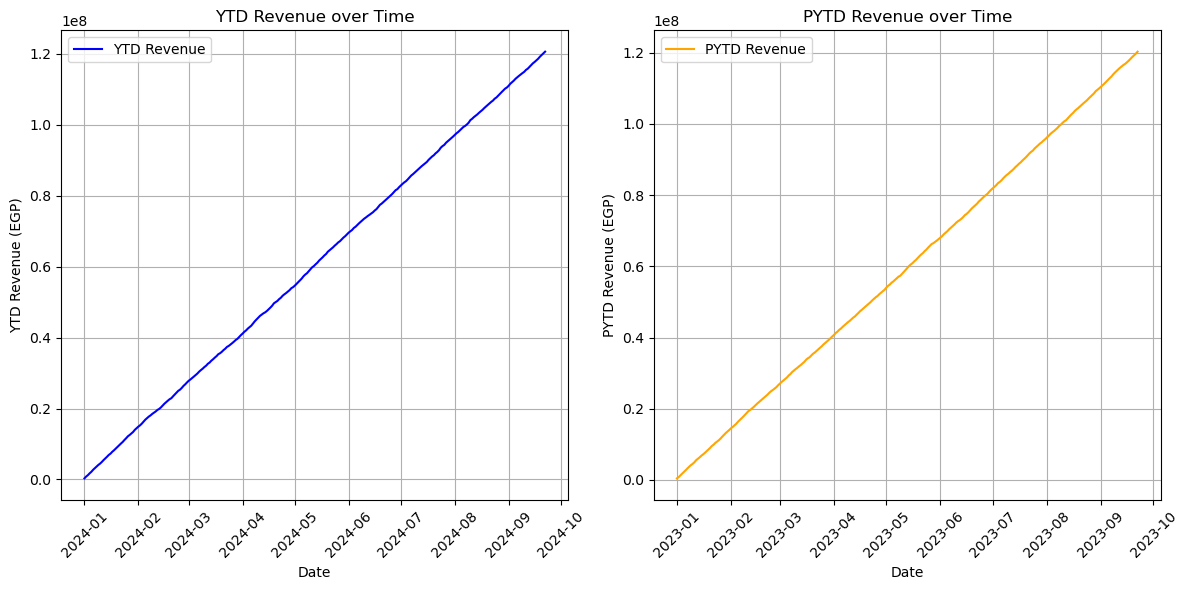

In [36]:
plt.figure(figsize=(12, 6))

# Plot YTD Revenue
plt.subplot(1, 2, 1)
plt.plot(ytd_revenue_2024.index, ytd_revenue_2024.values, color='blue', label='YTD Revenue')
plt.title('YTD Revenue over Time')
plt.xlabel('Date')
plt.ylabel('YTD Revenue (EGP)')
plt.xticks(rotation=45)
plt.grid()
plt.legend()

# Plot PYTD Revenue
plt.subplot(1, 2, 2)
plt.plot(pytd_revenue.index, pytd_revenue.values, color='orange', label='PYTD Revenue')
plt.title('PYTD Revenue over Time')
plt.xlabel('Date')
plt.ylabel('PYTD Revenue (EGP)')
plt.xticks(rotation=45)
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

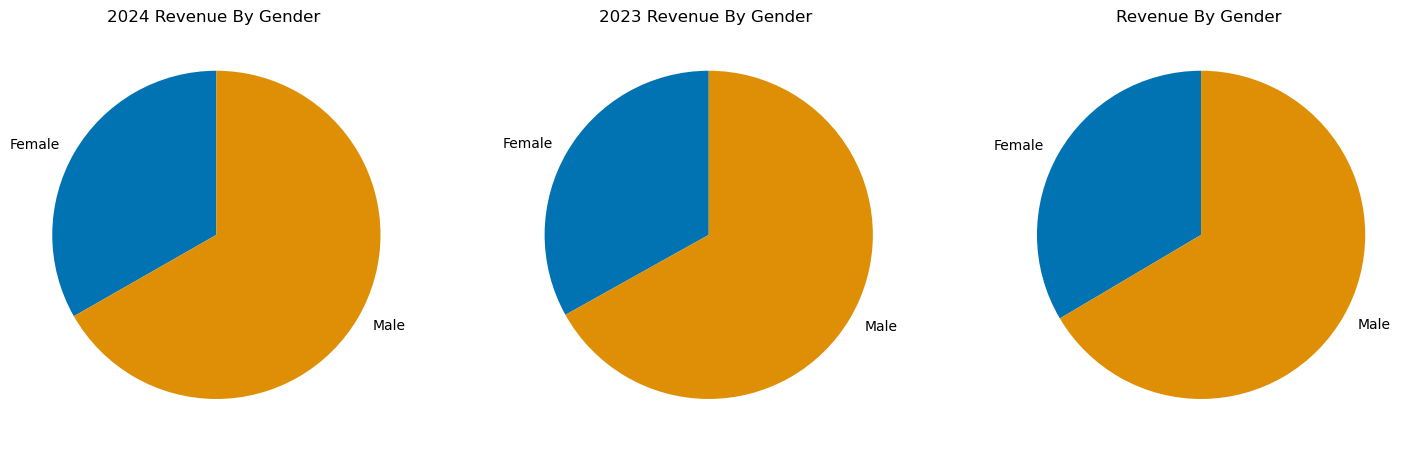

In [38]:
ytd_revenue_byGender_2024 = df_ytd.groupby('Customer_Gender')['Revenue'].sum().cumsum()
plt.figure(figsize=(18,6))
plt.subplot(1, 3, 1)
plt.pie(ytd_revenue_byGender_2024.values,labels=ytd_revenue_byGender_2024.index, startangle=90, colors=sns.color_palette("colorblind"))
plt.title('2024 Revenue By Gender ')
pytd_revenue_byGender_2023 = df_pytd.groupby('Customer_Gender')['Revenue'].sum().cumsum()
plt.subplot(1, 3, 2)
plt.pie(pytd_revenue_byGender_2023.values,labels=pytd_revenue_byGender_2023.index, startangle=90, colors=sns.color_palette("colorblind"))
plt.title('2023 Revenue By Gender ')

revenue_byGender = df.groupby('Customer_Gender')['Revenue'].sum().cumsum()
plt.subplot(1, 3, 3)
plt.pie(revenue_byGender.values,labels=revenue_byGender.index, startangle=90, colors=sns.color_palette("colorblind"))
plt.title('Revenue By Gender ')

plt.show()

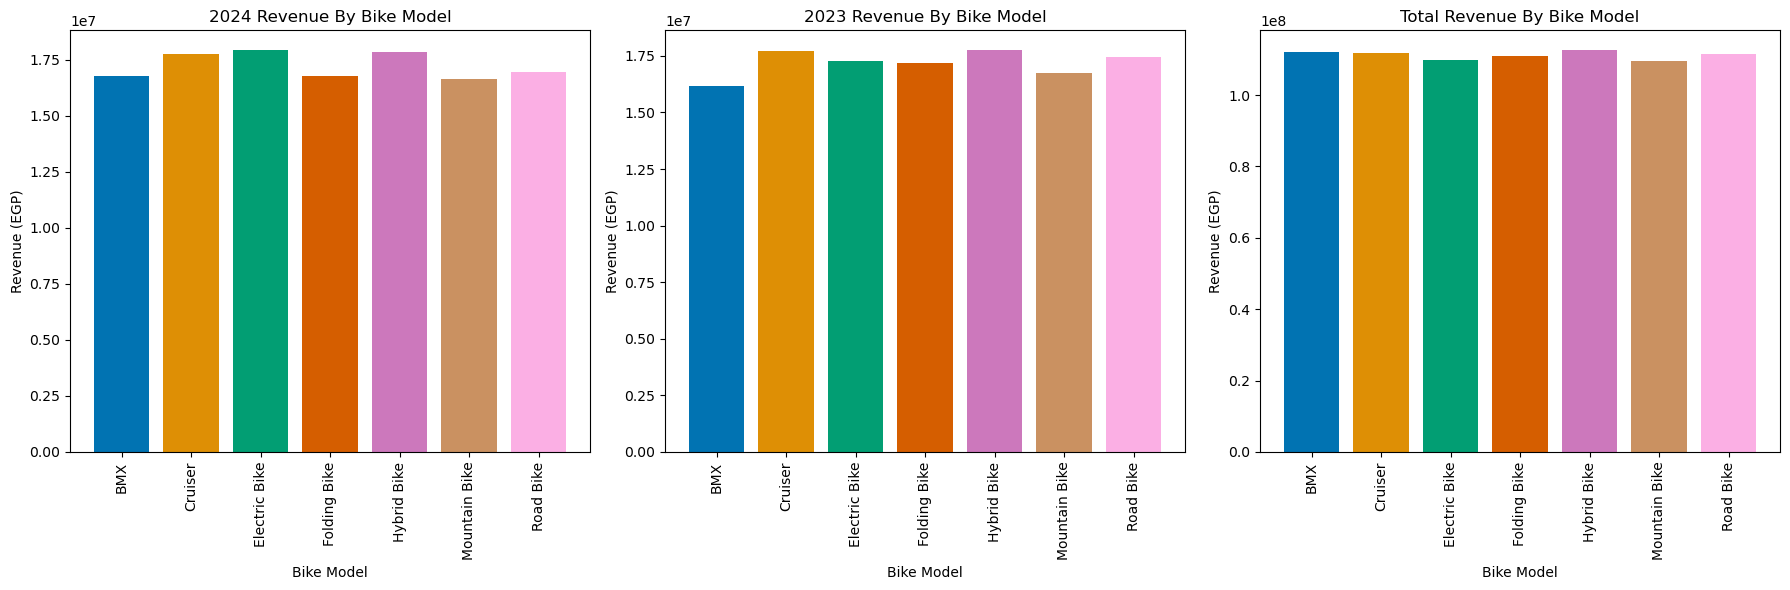

In [40]:
# Calculating YTD and PYTD revenue by gender
ytd_revenue_byBike_Model_2024 = df_ytd.groupby('Bike_Model')['Revenue'].sum()
pytd_revenue_byBike_Model_2023 = df_pytd.groupby('Bike_Model')['Revenue'].sum()
revenue_byBike_Model = df.groupby('Bike_Model')['Revenue'].sum()

# Set up the figure
plt.figure(figsize=(18, 6))

# Bar chart for YTD Revenue By Bike_Model for 2024
plt.subplot(1, 3, 1)
plt.bar(ytd_revenue_byBike_Model_2024.index, ytd_revenue_byBike_Model_2024.values, color=sns.color_palette("colorblind"))
plt.title('2024 Revenue By Bike Model')
plt.xlabel('Bike Model')
plt.ylabel('Revenue (EGP)')
plt.xticks(rotation=90)

# Bar chart for PYTD Revenue By Bike_Model for 2023
plt.subplot(1, 3, 2)
plt.bar(pytd_revenue_byBike_Model_2023.index, pytd_revenue_byBike_Model_2023.values, color=sns.color_palette("colorblind"))
plt.title('2023 Revenue By Bike Model')
plt.xlabel('Bike Model')
plt.ylabel('Revenue (EGP)')
plt.xticks(rotation=90)

# Bar chart for Total Revenue By Bike_Model
plt.subplot(1, 3, 3)
plt.bar(revenue_byBike_Model.index, revenue_byBike_Model.values, color=sns.color_palette("colorblind"))
plt.title('Total Revenue By Bike Model')
plt.xlabel('Bike Model')
plt.ylabel('Revenue (EGP)')
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()


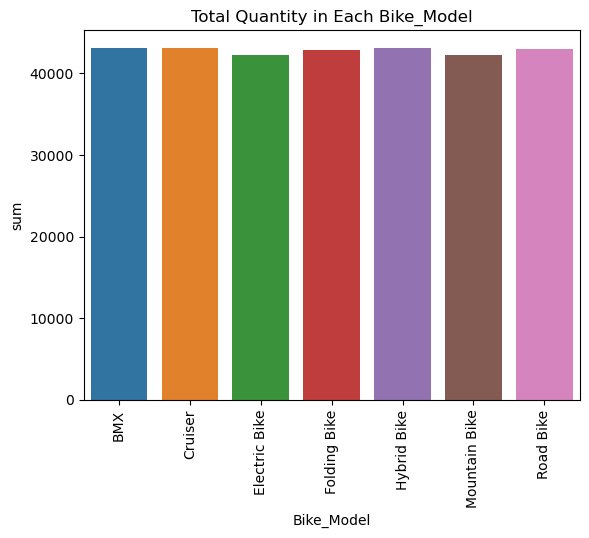

In [42]:
category_q_att=df.groupby(['Bike_Model']).apply(lambda x:x['Quantity'].sum()).reset_index(name='sum')
sns.barplot(data=category_q_att, x='Bike_Model', y='sum')
plt.title('Total Quantity in Each Bike_Model')
plt.xticks(rotation=90)
plt.show()

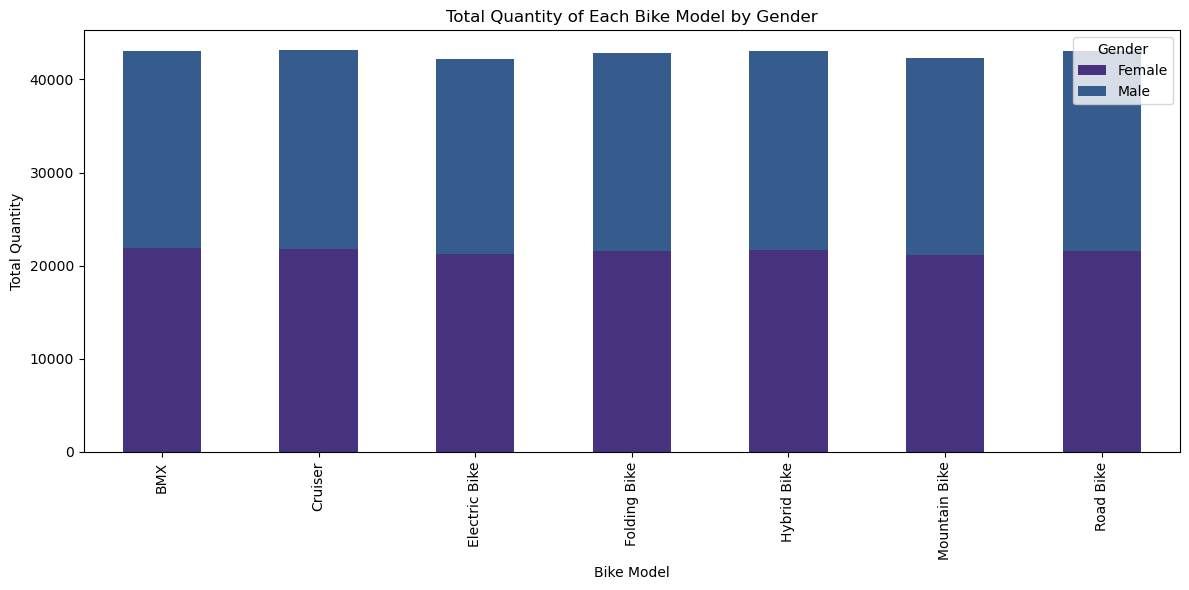

In [52]:
#Step 1: Group the data by Bike_Model and Customer_Gender to get the sum of quantities
category_q_att = df.groupby(['Bike_Model', 'Customer_Gender'])['Quantity'].sum().reset_index()

# Step 2: Pivot the data to format it for a stacked bar chart
pivot_data = category_q_att.pivot(index='Bike_Model', columns='Customer_Gender', values='Quantity').fillna(0)

# Step 3: Plotting the stacked bar chart
pivot_data.plot(kind='bar', stacked=True, figsize=(12, 6), color=sns.color_palette("viridis"))

# Customize the plot
plt.title('Total Quantity of Each Bike Model by Gender')
plt.xlabel('Bike Model')
plt.ylabel('Total Quantity')
plt.xticks(rotation=90)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

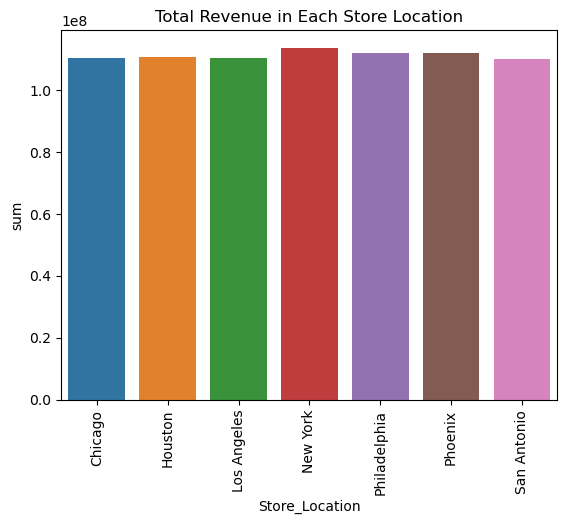

In [54]:
category_q_att=df.groupby(['Store_Location']).apply(lambda x:x['Revenue'].sum()).reset_index(name='sum')
sns.barplot(data=category_q_att, x='Store_Location', y='sum')
plt.title('Total Revenue in Each Store Location')
plt.xticks(rotation=90)
plt.show()

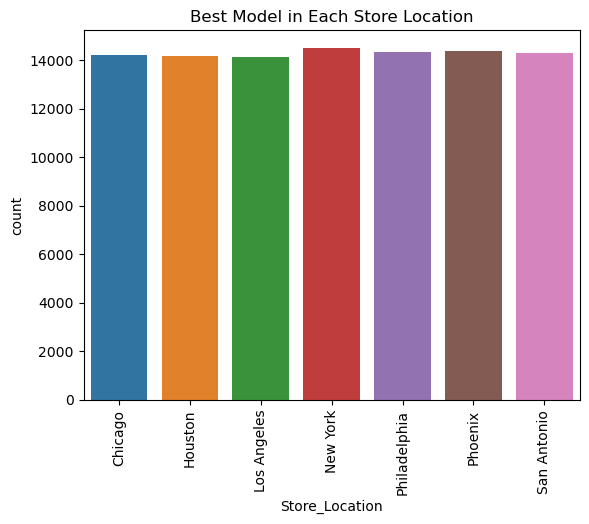

In [56]:
category_q_att=df.groupby(['Store_Location']).apply(lambda x:x['Bike_Model'].count()).reset_index(name='count')
sns.barplot(data=category_q_att, x='Store_Location', y='count')
plt.title('Best Model in Each Store Location')
plt.xticks(rotation=90)
plt.show()

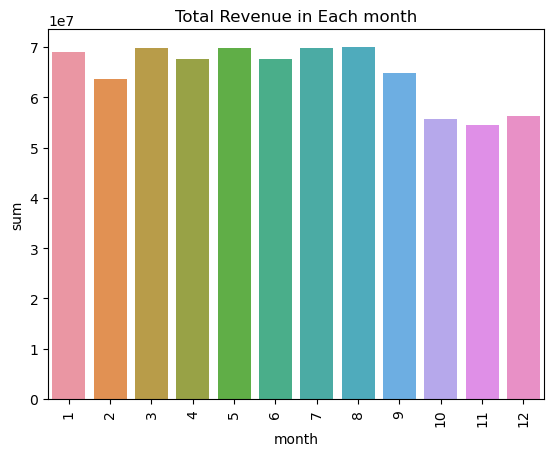

In [58]:
category_q_att=df.groupby(['month']).apply(lambda x:x['Revenue'].sum()).reset_index(name='sum')
sns.barplot(data=category_q_att, x='month', y='sum')
plt.title('Total Revenue in Each month')
plt.xticks(rotation=90)
plt.show()

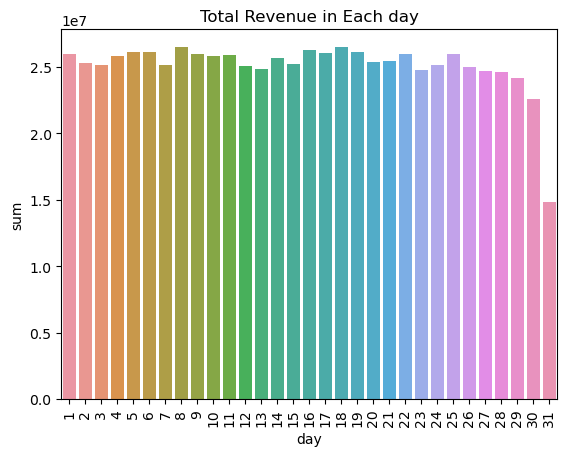

In [60]:
category_q_att=df.groupby(['day']).apply(lambda x:x['Revenue'].sum()).reset_index(name='sum')
sns.barplot(data=category_q_att, x='day', y='sum')
plt.title('Total Revenue in Each day')
plt.xticks(rotation=90)
plt.show()

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Sale_ID          100000 non-null  int64         
 1   Date             100000 non-null  datetime64[ns]
 2   Customer_ID      100000 non-null  int64         
 3   Bike_Model       100000 non-null  object        
 4   Price            100000 non-null  float64       
 5   Quantity         100000 non-null  int64         
 6   Store_Location   100000 non-null  object        
 7   Salesperson_ID   100000 non-null  int64         
 8   Payment_Method   100000 non-null  object        
 9   Customer_Age     100000 non-null  int64         
 10  Customer_Gender  100000 non-null  object        
 11  Revenue          100000 non-null  float64       
 12  year             100000 non-null  int32         
 13  month            100000 non-null  int32         
 14  day              1000

In [64]:
Salesperson=df.groupby(['Salesperson_ID']).apply(lambda x:x['Revenue'].sum()).reset_index(name='sum').sort_values(by='sum', ascending=False)
Salesperson.head(10)

Salesperson_ID         sum
694             794  1196096.15
400             500  1137238.34
505             605  1125911.79
555             655  1123963.90
814             914  1123278.39
658             758  1105827.98
319             419  1105377.27
794             894  1101144.40
440             540  1100962.64
385             485  1100888.46

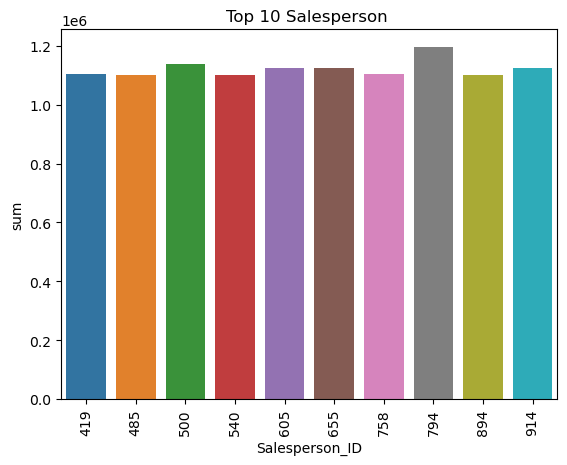

In [66]:
Salesperson=df.groupby(['Salesperson_ID']).apply(lambda x:x['Revenue'].sum()).reset_index(name='sum').sort_values(by='sum', ascending=False)
top_salespersons = Salesperson.nlargest(10, 'sum')
sns.barplot(data=top_salespersons, x='Salesperson_ID', y='sum')
plt.title('Top 10 Salesperson ')
plt.xticks(rotation=90)
plt.show()

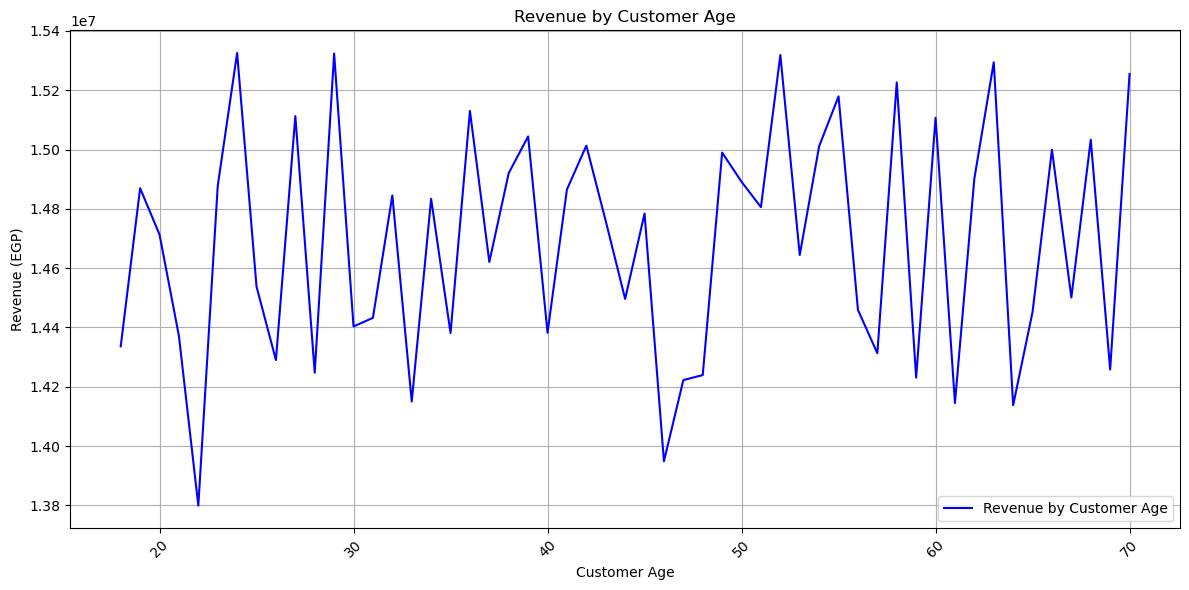

In [68]:
# Step 1: Group by Customer_Age and sum the Revenue
Customer_Age = df.groupby(['Customer_Age'])['Revenue'].sum().reset_index(name='sum')

# Step 2: Plotting
plt.figure(figsize=(12, 6))

# Correctly reference the 'sum' column for y-values
plt.plot(Customer_Age['Customer_Age'], Customer_Age['sum'], color='blue', label='Revenue by Customer Age')

# Customize the plot
plt.title('Revenue by Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Revenue (EGP)')
plt.xticks(rotation=45)
plt.grid()
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [72]:
sats_att = df.groupby(['Customer_Age', 'Bike_Model']).apply(lambda x: x['Revenue'].sum()).reset_index(name='sum')

# Step 2: Pivot the data to format it for plotting
pivot_data = sats_att.pivot(index='Customer_Age', columns='Bike_Model', values='sum').fillna(0)

# Step 3: Plotting
plt.figure(figsize=(12, 6))

# Create an area plot using fill_between
for bike_model in pivot_data.columns:
    plt.fill_between(pivot_data.index, pivot_data[bike_model], label=bike_model, alpha=0.5)

# Customize the plot
plt.title('Which Bike Model Sells More in Each Age')
plt.xlabel('Customer Age')
plt.ylabel('Revenue (EGP)')
plt.xticks(rotation=45)
plt.legend(title='Bike Model')
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

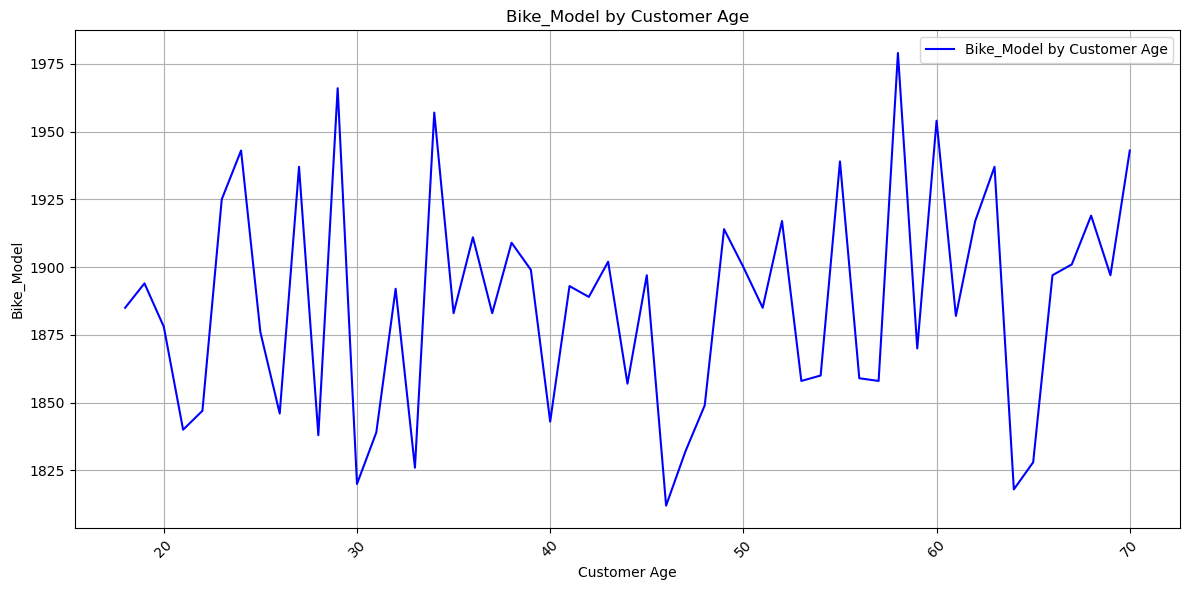

In [74]:
# Step 1: Group by Customer_Age and sum the Revenue
Customer_Age = df.groupby(['Customer_Age'])['Bike_Model'].count().reset_index(name='count')

# Step 2: Plotting
plt.figure(figsize=(12, 6))

# Correctly reference the 'sum' column for y-values
plt.plot(Customer_Age['Customer_Age'], Customer_Age['count'], color='blue', label='Bike_Model by Customer Age')

# Customize the plot
plt.title('Bike_Model by Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Bike_Model')
plt.xticks(rotation=45)
plt.grid()
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

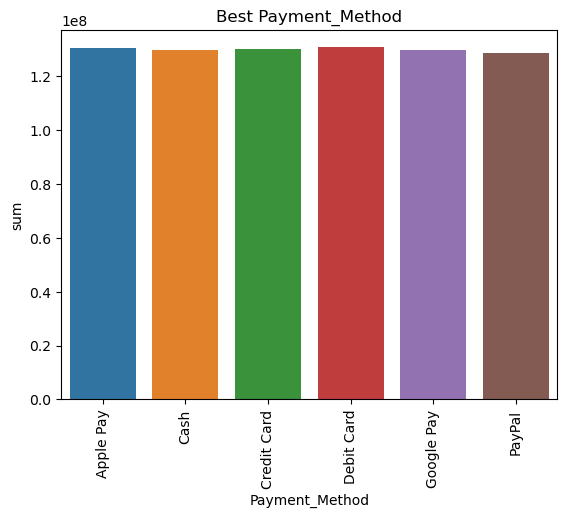

In [76]:
Payment_Method=df.groupby(['Payment_Method']).apply(lambda x:x['Revenue'].sum()).reset_index(name='sum')
sns.barplot(data=Payment_Method, x='Payment_Method', y='sum')
plt.title('Best Payment_Method')
plt.xticks(rotation=90)
plt.show()

In [78]:
Customer = df.groupby(['Customer_ID']).agg(Revenue=('Revenue', 'sum'),  Quantity=('Quantity', 'sum')).reset_index()
top_Customer = Customer.nlargest(10, 'Revenue')
top_Customer.head(10)

Customer_ID    Revenue  Quantity
1490         2490  265308.38        81
781          1781  236006.11        73
8835         9835  226437.56        76
1111         2111  225948.63        77
5568         6568  225651.03        68
8807         9807  224528.24        62
3983         4983  223929.60        70
6186         7186  222267.20        70
1206         2206  218740.85        82
3660         4660  209181.01        62

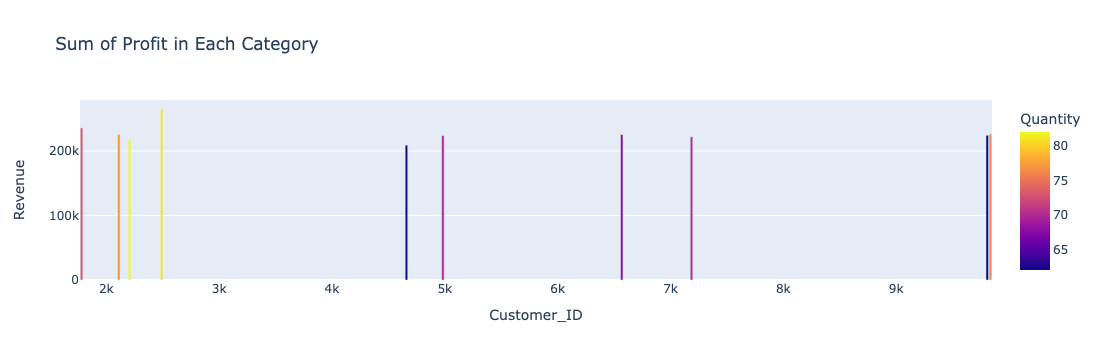

In [80]:
fig=px.bar(top_Customer,x='Customer_ID',y='Revenue',color='Quantity',title='Sum of Profit in Each Category')
fig.show()